# **DIABETES PREDICTION**

<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSNaOH_nV4JyQkwc34EDVlqXr6JQZGxUSSt4A&usqp=CAU" >

The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. The given dataset female gender and Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

## Data description

 > Pregnancies               -     Number of times pregnant <br>
 > Glucose                   -     Plasma glucose concentration a 2 hours in an oral glucose tolerance test<br>
 > Blood Pressure            -     Diastolic blood pressure (mm Hg)<br>
 > Skin Thickness            -     Triceps skin fold thickness (mm)<br>
 > Insulin                   -     2-Hour serum insulin (mu U/ml)<br>
 > BMI                       -     Body mass index (weight in kg/(height in m)^2)<br>
 > DiabetesPedgreeFunction   -     Diabetes pedgree function<br>
 > Age                       -     Age(years)<br>
 > outcome                   -     class variable(0 or 1)<br>

<h2 style='background:skyblue; border:0px; color:black'><center><strong>Dataset import and Feature engineering<strong><center><h2>

## Dataset import and Feature engineering

In [42]:
import pandas as pd
import numpy as np

import opendatasets as od

import warnings
warnings.filterwarnings("ignore")

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9,4 )
matplotlib.rcParams['figure.facecolor'] = '#00000000'




In [43]:
dataset_url = "https://www.kaggle.com/uciml/pima-indians-diabetes-database"
od.download(dataset_url)

Skipping, found downloaded files in ".\pima-indians-diabetes-database" (use force=True to force download)


In [44]:
data_dir="./pima-indians-diabetes-database"
os.listdir(data_dir)

['diabetes.csv']

In [45]:
data = pd.read_csv("./pima-indians-diabetes-database/diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [47]:
data["Outcome"].value_counts()


0    500
1    268
Name: Outcome, dtype: int64

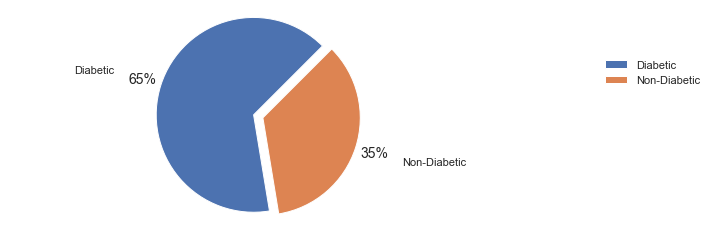

In [48]:

fig,ax = plt.subplots()
#plt.rcParams['font.sans-serif'] = 'Arial'
#plt.rcParams['font.family'] = 'sans-serif'
#plt.rcParams['text.color'] = 'white'
#plt.rcParams['axes.labelcolor']= 'white'
#plt.rcParams['xtick.color'] = 'white'
#plt.rcParams['ytick.color'] = 'white'
#plt.rcParams['font.size']=12
labels = ['Diabetic','Non-Diabetic']
percentages = [(500/(768))*100, (268/(768))*100]
explode = (0.1,0)
ax.pie(percentages,explode=explode,labels=labels, autopct='%1.0f%%', 
       shadow=False, startangle=45,   
       pctdistance=1.2,labeldistance=1.5)
ax.axis('equal')
ax.legend(frameon=False, bbox_to_anchor=(1.4,0.8))

In [49]:
min_values=data.describe().iloc[3,:]
lst = list(min_values.index)
for i in lst:
    print("Minimum value of  column {} is {} ".format(i,min_values[i]))


Minimum value of  column Pregnancies is 0.0 
Minimum value of  column Glucose is 0.0 
Minimum value of  column BloodPressure is 0.0 
Minimum value of  column SkinThickness is 0.0 
Minimum value of  column Insulin is 0.0 
Minimum value of  column BMI is 0.0 
Minimum value of  column DiabetesPedigreeFunction is 0.078 
Minimum value of  column Age is 21.0 
Minimum value of  column Outcome is 0.0 


Glucose,Blood Pressure,Skin thickness, Insulin,BMI cannot have values 0.<br>
Hence we can replace this data into NAN values


In [50]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

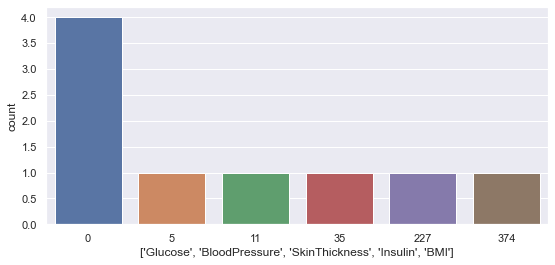

In [51]:
columns = ['Glucose','BloodPressure','SkinThickness', 'Insulin','BMI']
for i in columns:
    data[i].replace(0,np.nan,inplace=True)
k=data.isnull().sum()
sns.countplot(k)
plt.xlabel(columns)
plt.rcParams['text.color'] = 'black'

In [52]:
data.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

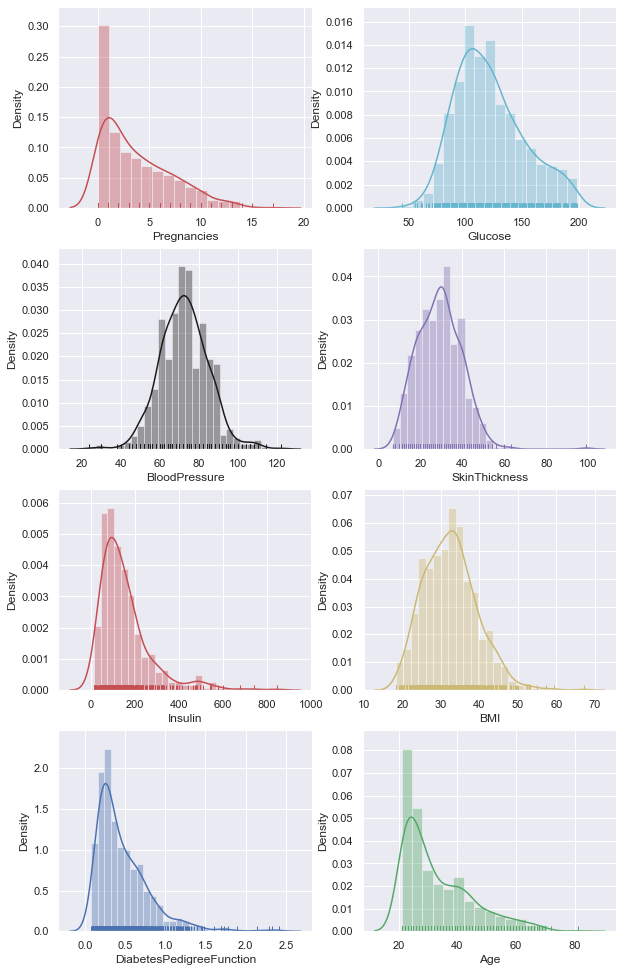

In [53]:
columns1 = ['Pregnancies','Glucose','BloodPressure','SkinThickness', 'Insulin','BMI','DiabetesPedigreeFunction','Age']
sns.set(rc={'figure.figsize':(10,17)})

colours=['r','c','k','m','r','y','b','g']

for i in range(len(columns1)):
    
    plt.subplot(4,2,i+1)
    sns.distplot(data[columns1[i]], hist=True, rug=True, color=colours[i])

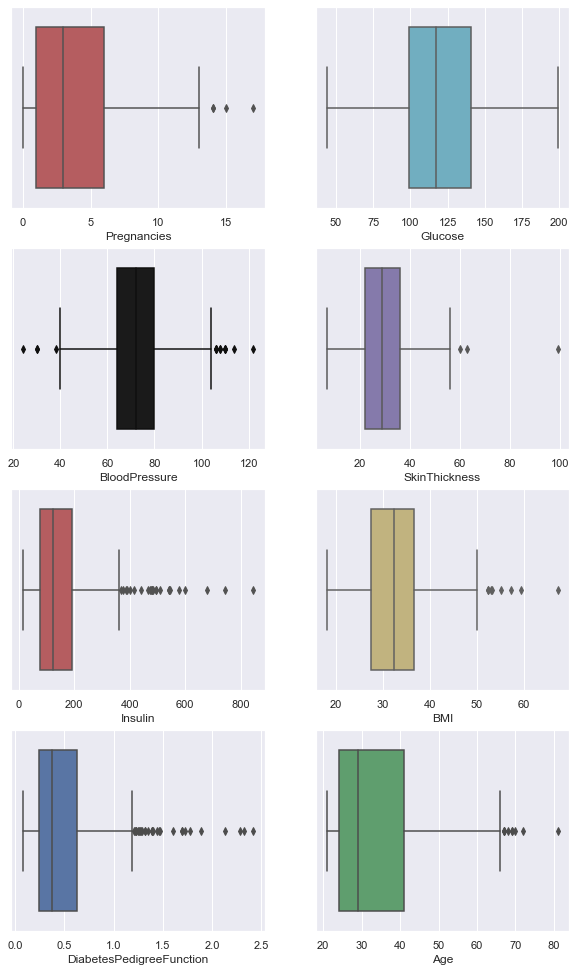

In [54]:
columns1 = ['Pregnancies','Glucose','BloodPressure','SkinThickness', 'Insulin','BMI','DiabetesPedigreeFunction','Age']
sns.set(rc={'figure.figsize':(10,17)})

colours=['r','c','k','m','r','y','b','g']

for i in range(len(columns1)):
    
    plt.subplot(4,2,i+1)
    sns.boxplot(data[columns1[i]],  color=colours[i])

In [55]:
from scipy.stats import skew
for i in columns1:
    print('Skewness of {} is {}'.format(i,data[i].skew()))
    


Skewness of Pregnancies is 0.9016739791518588
Skewness of Glucose is 0.5309885349396285
Skewness of BloodPressure is 0.13415273171959252
Skewness of SkinThickness is 0.690619013984192
Skewness of Insulin is 2.166463843812443
Skewness of BMI is 0.5939697505712673
Skewness of DiabetesPedigreeFunction is 1.919911066307204
Skewness of Age is 1.1295967011444805


It is observed that column Insulin and Diabete Pedigree Function data is highly skewed

From the above boxplots and distribution plots, it is observed that the data related to insulin is skewed and have more outliers. Outlier data points will have impact on mean ,hence, in such cases, choosing median as a imputer is a good choice. For symmetric distribution ,mean can be used as an imputer technique for missing values.

Hence, i would like to use median for replacing null values in insulin data column and mean for other columns containing null values.

In [56]:
# Impute missing numerical values
# median is used to replace null in insulin column
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
data['Insulin']= imputer.fit_transform(data[['Insulin']])
data['Insulin'].isnull().any()

False

In [57]:
# mean is used to replace null in other columns
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
columns2 = ['Glucose','BloodPressure','SkinThickness','BMI']

data[columns2]= imputer.fit_transform(data[columns2])
data[columns2].isnull().any()


Glucose          False
BloodPressure    False
SkinThickness    False
BMI              False
dtype: bool

## EDA

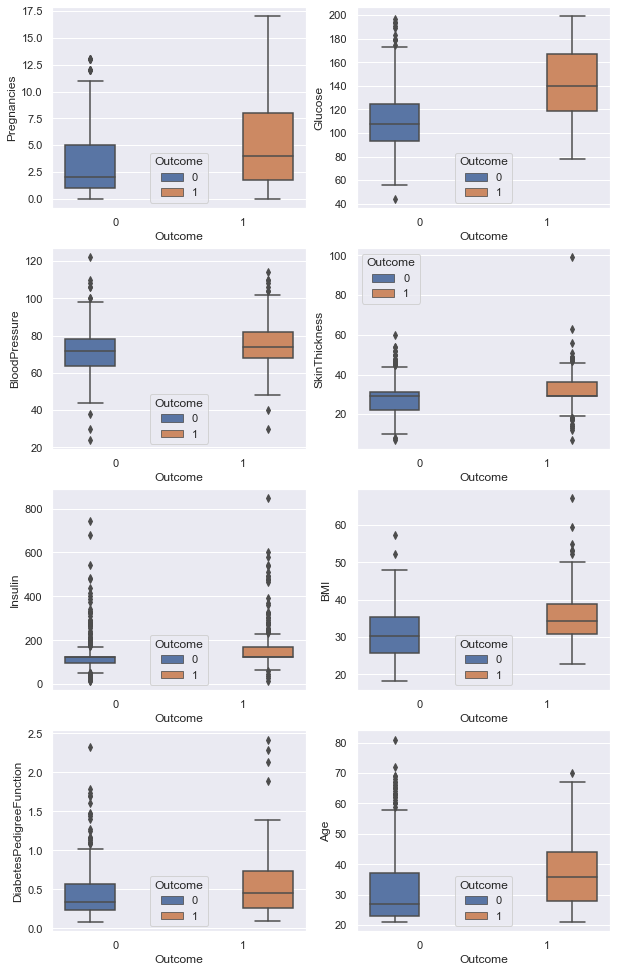

In [58]:

sns.set(rc={'figure.figsize':(10,17)})

#colours=['r','c','k','m','r','y','b','g']

for i in range(len(columns1)):
    
    plt.subplot(4,2,i+1)
    sns.boxplot(x=data['Outcome'],y=data[columns1[i]],hue=data['Outcome'])

It can be observed that:

Diabetic people have higher DiabetePedifreeFunction i.e, genetic influence plays some role in diabetes among patients

Higher glucose levels leads to more chances of Diabetes

When the Blood pressure is higher there are chances of having diabetes

Higher the insulin more the chances of diabetes

less chance of diabetes among young people

Higher the BMI, more is risk of having diabetes

<AxesSubplot:xlabel='Outcome', ylabel='Pregnancies'>

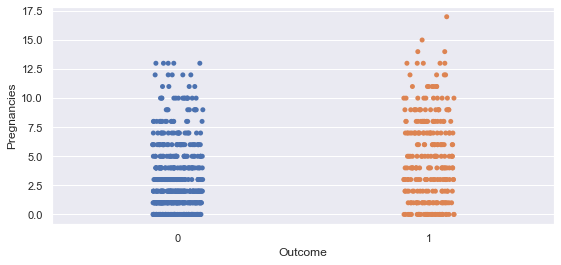

In [59]:
sns.set(rc={'figure.figsize':(9,4)})
sns.stripplot(x='Outcome',y='Pregnancies',data=data)


we can see higher number of pregnancies result in having diabetes

Pair Plots are a really simple (one-line-of-code simple!) way to visualize relationships between each variable. It produces a matrix of relationships between each variable in your data for an instant examination of our data.

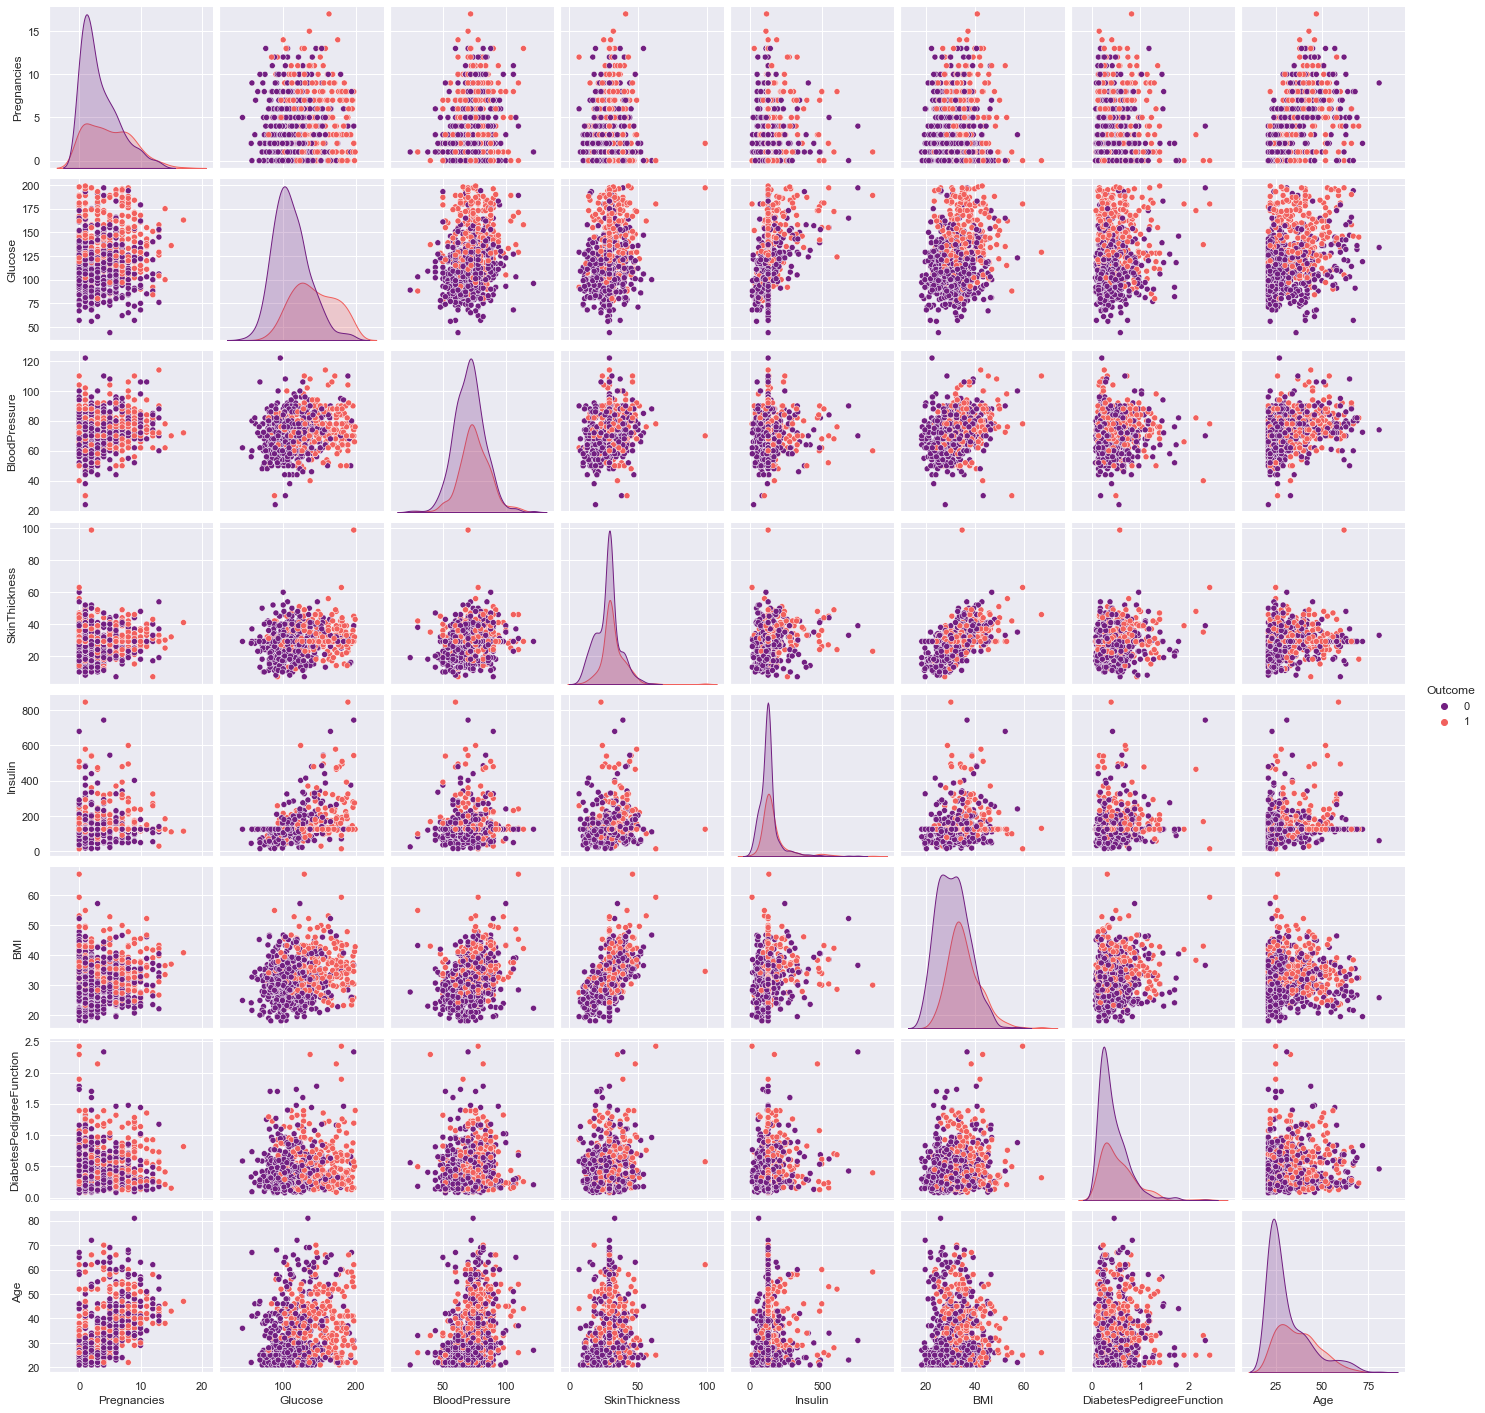

In [60]:

sns.pairplot(data,hue='Outcome',palette='magma')

correlation Matrix

<AxesSubplot:>

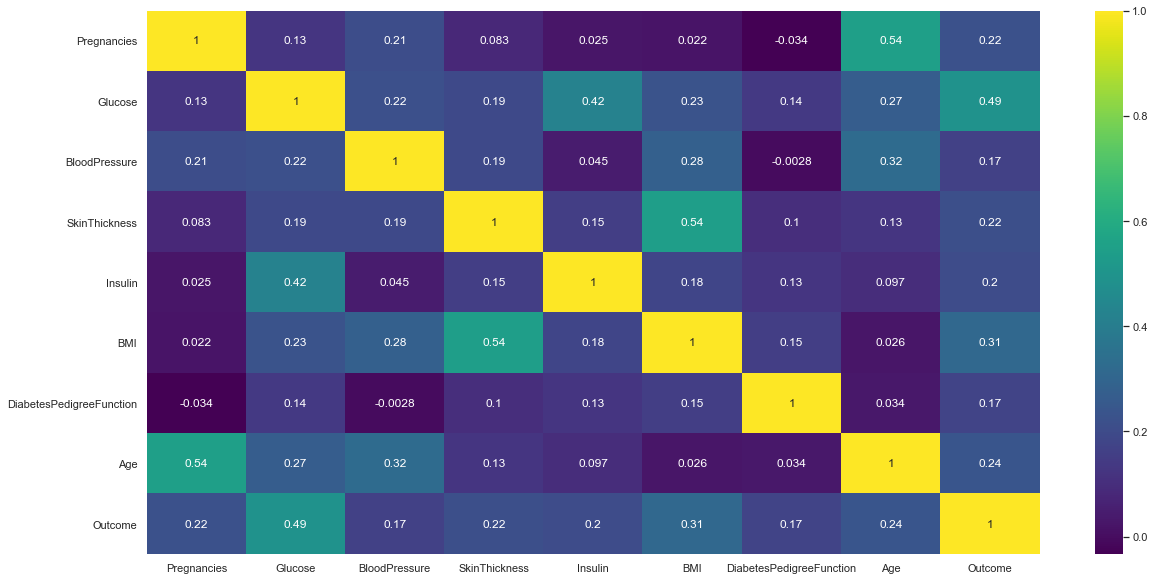

In [61]:
sns.set(rc={'figure.figsize':(20,10)})

sns.heatmap(data.corr(),annot=True,cmap='viridis')

It is observed that the features are low corelated, hence less chance of mutlicollinearity

## Data preprocessing

In [62]:
input_cols = list(data.columns)[0:8]
input_df = data[input_cols].copy()
target_df = data["Outcome"]
input_df[input_cols]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.00000,125.0,33.6,0.627,50
1,1,85.0,66.0,29.00000,125.0,26.6,0.351,31
2,8,183.0,64.0,29.15342,125.0,23.3,0.672,32
3,1,89.0,66.0,23.00000,94.0,28.1,0.167,21
4,0,137.0,40.0,35.00000,168.0,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.00000,180.0,32.9,0.171,63
764,2,122.0,70.0,27.00000,125.0,36.8,0.340,27
765,5,121.0,72.0,23.00000,112.0,26.2,0.245,30
766,1,126.0,60.0,29.15342,125.0,30.1,0.349,47


In [63]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
input_df= pd.DataFrame(sc.fit_transform(input_df),columns=input_cols)



In [64]:
# splitting the data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(input_df,target_df,test_size=0.30,random_state=42)
x_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
334,-0.844885,-0.877389,-1.026200e+00,-1.269567e+00,-0.957662,-1.245506,-0.639892,-0.956462
139,0.342981,-0.548616,-3.351824e-02,-1.746338e-02,2.135236,0.646594,-0.944924,-0.445935
485,-1.141852,0.437703,-3.644121e-01,1.462295e+00,1.266445,1.432543,-0.322779,-0.786286
547,0.046014,0.306194,-3.644121e-01,-9.280841e-01,0.293398,0.093519,-0.941903,-0.445935
18,-0.844885,-0.614370,-3.507904e+00,1.006985e+00,-0.668065,1.578089,-0.872441,-0.020496
...,...,...,...,...,...,...,...,...
71,0.342981,0.569212,-6.953060e-01,6.655021e-01,-0.007783,-0.561439,-0.183854,-0.616111
106,-0.844885,-0.844511,4.102655e+00,8.087936e-16,-0.181541,-1.463825,-0.799958,-0.531023
270,1.827813,-0.680125,1.124610e+00,8.931573e-01,-0.181541,1.912845,2.005732,0.404942
435,-1.141852,0.634967,1.175571e-15,8.087936e-16,-0.181541,1.447098,-0.805998,-0.360847


## **MODEL SELECTION**

In [65]:
from sklearn.model_selection import  GridSearchCV
from sklearn.metrics import accuracy_score


<h2 style='background:skyblue; border:0px; color:black'><center><strong>Logistic Regression<strong><center><h2>

## Logistic Regression

In [66]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(penalty='l2',C=1,solver='liblinear')
lr_model.fit(x_train,y_train)

print("Train Set Accuracy:",accuracy_score(y_train,lr_model.predict(x_train))*100)
print("Test Set Accuracy:",accuracy_score(y_test,lr_model.predict(x_test))*100)

Train Set Accuracy: 78.58472998137802
Test Set Accuracy: 74.02597402597402


## Using GridSearch CV

In [67]:
log_params = {'penalty':['l1', 'l2'], 
              'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 100], 
              'solver':['liblinear', 'saga']} 
log_model = GridSearchCV(LogisticRegression(), log_params,n_jobs=-1, cv=5) #Tuning the hyper-parameters
log_model.fit(x_train, y_train)
log_predict = log_model.predict(x_test)
log_score = log_model.best_score_
print('---------------------------------')
print('Best parameters: ',log_model.best_params_)
print('---------------------------------')
print('Best score: ', log_score*100)




---------------------------------
Best parameters:  {'C': 0.1, 'penalty': 'l2', 'solver': 'saga'}
---------------------------------
Best score:  77.6497057805469


In [68]:
from sklearn.metrics import confusion_matrix
#let us get the predictions using the classifier we had fit above
y_pred = log_model.predict(x_test)
confusion_matrix(y_test,y_pred)

array([[124,  27],
       [ 34,  46]], dtype=int64)


<h2 style='background:skyblue; border:0px; color:black'><center><strong>Decision Tree<strong><center><h2>

## Decision Tree

In [69]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(criterion='entropy',max_depth=5,splitter='best')
dt_model.fit(x_train,y_train)



print("Train Set Accuracy:",accuracy_score(y_train,dt_model.predict(x_train))*100)
print("Test Set Accuracy:",accuracy_score(y_test,dt_model.predict(x_test))*100)

Train Set Accuracy: 81.56424581005587
Test Set Accuracy: 75.32467532467533


## Using GridSearch CV

In [70]:

from sklearn.tree import DecisionTreeClassifier
dtc_params = {'criterion' : ['gini', 'entropy'],
              'splitter': ['random', 'best'], 
              'max_depth': [3, 5, 7, 9, 11, 13]}
dtc_model = GridSearchCV(DecisionTreeClassifier(), dtc_params, cv=5,n_jobs=-1) #Tuning the hyper-parameters
dtc_model.fit(x_train, y_train)
dtc_predict = dtc_model.predict(x_test)
dtc_score = dtc_model.best_score_
print('---------------------------------')
print('Best parameters: ',dtc_model.best_params_)
print('---------------------------------')
print('Best score: ', dtc_score*100)




---------------------------------
Best parameters:  {'criterion': 'entropy', 'max_depth': 3, 'splitter': 'best'}
---------------------------------
Best score:  74.49290411907235


In [71]:
y_pred = dtc_model.predict(x_test)
confusion_matrix(y_test,y_pred)

array([[141,  10],
       [ 55,  25]], dtype=int64)

<h2 style='background:skyblue; border:0px; color:black'><center><strong>Random Forest<strong><center><h2>

## Random Forest

In [72]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(criterion='entropy',max_depth=5,n_estimators= 5)
rf_model.fit(x_train,y_train)



print("Train Set Accuracy:",accuracy_score(y_train,rf_model.predict(x_train))*100)
print("Test Set Accuracy:",accuracy_score(y_test,rf_model.predict(x_test))*100)



Train Set Accuracy: 83.05400372439479
Test Set Accuracy: 75.75757575757575


## Using GridSearch CV

In [73]:
rfc_params = {'criterion' : ['gini', 'entropy'],
             'n_estimators': list(range(5, 26, 5)),
             'max_depth': list(range(3, 20, 2))}
rfc_model = GridSearchCV(RandomForestClassifier(), rfc_params, cv=5) #Tuning the hyper-parameters
rfc_model.fit(x_train, y_train)
rfc_predict = rfc_model.predict(x_test)
rfc_score = rfc_model.best_score_
print('---------------------------------')
print('Best parameters: ',rfc_model.best_params_)
print('---------------------------------')
print('Best score: ', rfc_score*100)


---------------------------------
Best parameters:  {'criterion': 'gini', 'max_depth': 13, 'n_estimators': 15}
---------------------------------
Best score:  78.57390100380755


In [74]:
y_pred = rfc_model.predict(x_test)
confusion_matrix(y_test,y_pred)

array([[122,  29],
       [ 25,  55]], dtype=int64)

<h2 style='background:skyblue; border:0px; color:black'><center><strong>Support Vector Classification<strong><center><h2>

## Support Vector Classification

In [75]:
from sklearn.svm import SVC
svm_model = SVC(C=1,kernel='linear')
svm_model.fit(x_train,y_train)    



print("Train Set Accuracy:",(accuracy_score(y_train,svm_model.predict(x_train))*100))
print("Test Set Accuracy:",(accuracy_score(y_test,svm_model.predict(x_test))*100))

Train Set Accuracy: 77.83985102420856
Test Set Accuracy: 73.59307359307358


## Using GridSearch CV

In [76]:
svc_params = {'C': [0.001, 0.01, 0.1, 1],
              'kernel': [ 'linear' , 'poly' , 'rbf' , 'sigmoid' ]}
svc_model = GridSearchCV(SVC(), svc_params, cv=5) #Tuning the hyper-parameters
svc_model.fit(x_train, y_train)
svc_predict = svc_model.predict(x_test)
svc_score = svc_model.best_score_

print('---------------------------------')
print('Best parameters: ',svc_model.best_params_)
print('---------------------------------')
print('Best score: ', svc_score*100)

---------------------------------
Best parameters:  {'C': 1, 'kernel': 'linear'}
---------------------------------
Best score:  77.46278989269642


In [77]:
y_pred = svc_model.predict(x_test)
confusion_matrix(y_test,y_pred)

array([[124,  27],
       [ 34,  46]], dtype=int64)

<h2 style='background:skyblue; border:0px; color:black'><center><strong>KNearest Neighbors<strong><center><h2>

## KNearest Neighbors

In [78]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=9,weights='uniform',algorithm='kd_tree',metric='euclidean')                #knn classifier
knn.fit(x_train,y_train)

knn_acc = accuracy_score(y_test,knn.predict(x_test))


print("Train Set Accuracy:",(accuracy_score(y_train,knn.predict(x_train))*100))
print("Test Set Accuracy:",(accuracy_score(y_test,knn.predict(x_test))*100))

Train Set Accuracy: 82.49534450651768
Test Set Accuracy: 72.72727272727273


## Using GridSearch CV

In [79]:
knn_params = {'n_neighbors': list(range(3, 20, 2)),
          'weights':['uniform', 'distance'],
          'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
          'metric':['euclidean', 'manhattan', 'chebyshev', 'minkowski']}
knn_model = GridSearchCV(KNeighborsClassifier(), knn_params, cv=5) #Tuning the hyper-parameters
knn_model.fit(x_train, y_train)
knn_predict = knn_model.predict(x_test)
knn_score = knn_model.best_score_

print('---------------------------------')
print('Best parameters: ',knn_model.best_params_)
print('---------------------------------')
print('Best score: ', knn_score*100)

---------------------------------
Best parameters:  {'algorithm': 'auto', 'metric': 'euclidean', 'n_neighbors': 13, 'weights': 'distance'}
---------------------------------
Best score:  79.32675666320527


In [80]:
y_pred = knn_model.predict(x_test)
confusion_matrix(y_test,y_pred)

array([[125,  26],
       [ 32,  48]], dtype=int64)

## Conclusion

                    Model     Score
1    KNeighborsClassifier  0.793268
4  RandomForestClassifier  0.785739
0      LogisticRegression  0.776497
2                     SVC  0.774628
3  DecisionTreeClassifier  0.744929


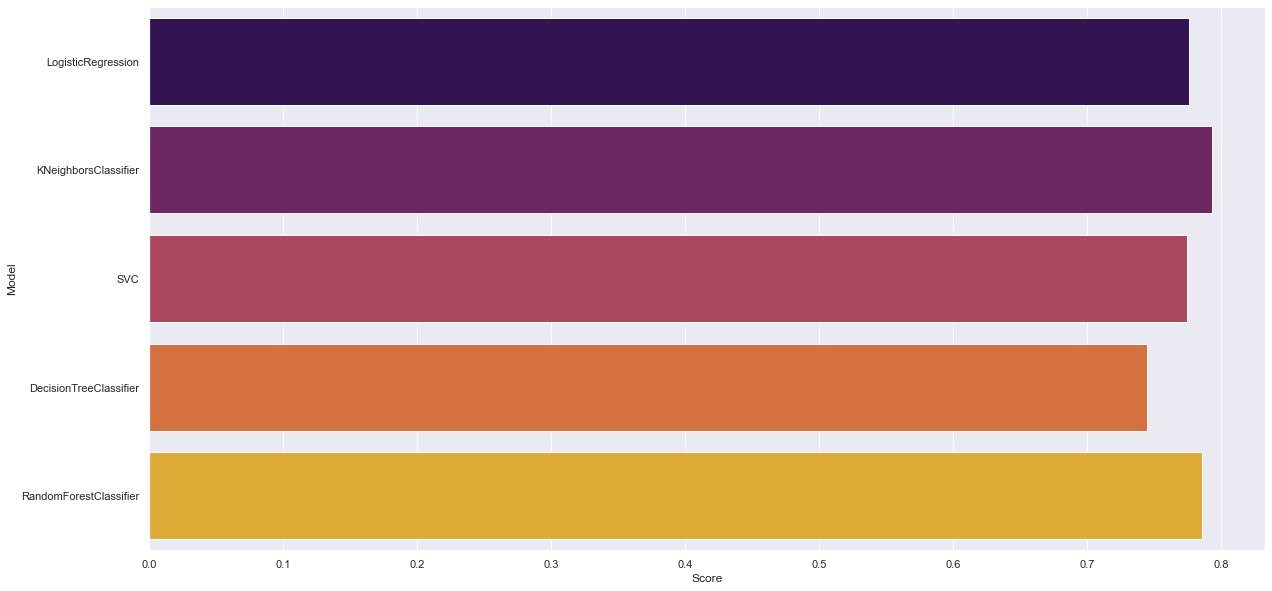

In [81]:
models = ['LogisticRegression', 'KNeighborsClassifier', 'SVC', 'DecisionTreeClassifier', 
          'RandomForestClassifier']
scores = [log_score, knn_score, svc_score,dtc_score,rfc_score]
score_table = pd.DataFrame({'Model':models, 'Score':scores})
score_table.sort_values(by='Score', axis=0, ascending=False)
print(score_table.sort_values(by='Score', ascending=False))
sns.barplot(x = score_table['Score'], y = score_table['Model'], palette='inferno');